<a href="https://colab.research.google.com/github/doo52oh/Dacon/blob/main/CreditCard_Overdue_Prediction/00_CreditCard_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용카드 사용자 연체 예측

## Columns

* **index**  
* **gender**: 성별  
* **car**: 차량 소유 여부  
* **reality**: 부동산 소유 여부  
* **child_num**: 자녀 수  
* **income_total**: 연간 소득  
* **income_type**: 소득 분류  
['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']  
* **edu_type**: 교육 수준  
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']  
* **family_type**: 결혼 여부  
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']  
* **house_type**: 생활 방식  
['Municipal apartment', 'House / apartment', 'With parents',  
'Co-op apartment', 'Rented apartment', 'Office apartment']  
* **DAYS_BIRTH**: 출생일   
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미  
* **DAYS_EMPLOYED**: 업무 시작일  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미   
양수 값은 고용되지 않은 상태를 의미함  
* **FLAG_MOBIL**: 핸드폰 소유 여부  
* **work_phone**: 업무용 전화 소유 여부  
* **phone**: 전화 소유 여부  
* **email**: 이메일 소유 여부  
* **occyp_type**: 직업 유형  
* **family_size**: 가족 규모  
* **begin_month**: 신용카드 발급 월  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미  
* **credit**: 사용자의 신용카드 대금 연체를 기준으로 한 신용도  
=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함  



In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time

import warnings
warnings.filterwarnings(action='ignore')


# Import Data

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [21]:
print(train.shape)
train.head()

(26457, 20)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [23]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [24]:
print(test.shape)
test.head()

(10000, 19)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [26]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

# EDA

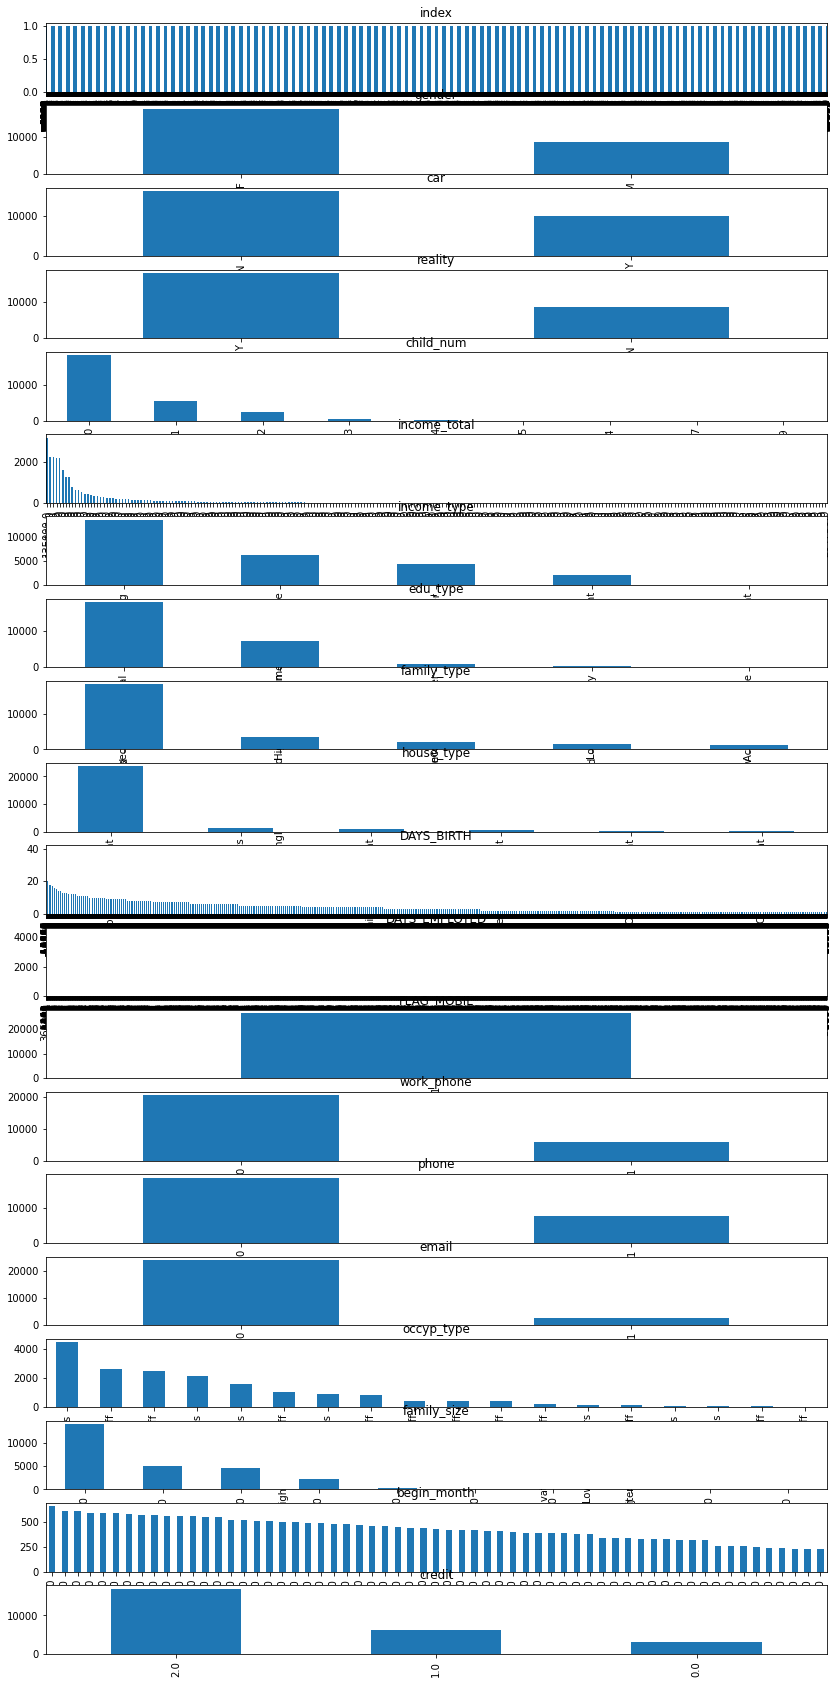

In [27]:
col = train.columns.tolist()

fig, ax = plt.subplots(nrows=len(col), ncols=1, figsize=(14,30))
cnt = 0

for c in col:
    train[c].value_counts().plot.bar(title=c, ax=ax[cnt])  
    cnt += 1

plt.show()
    

### Categorical Variable EDA

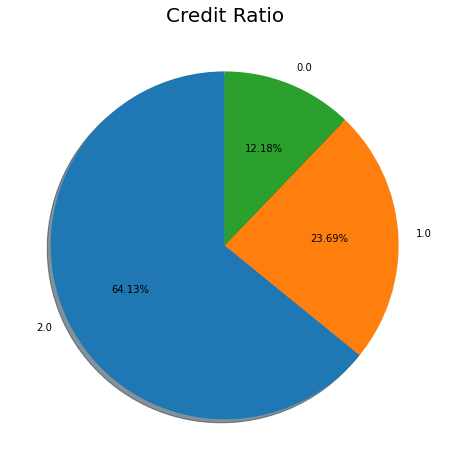

In [28]:
plt.subplots(figsize = (8,8))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Credit Ratio', size=20)
plt.show()


In [29]:
# 등급에 따른 차이를 보기 위한 데이터 분류
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

In [30]:
# Categorical 그래프 함수 정의
def cat_plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

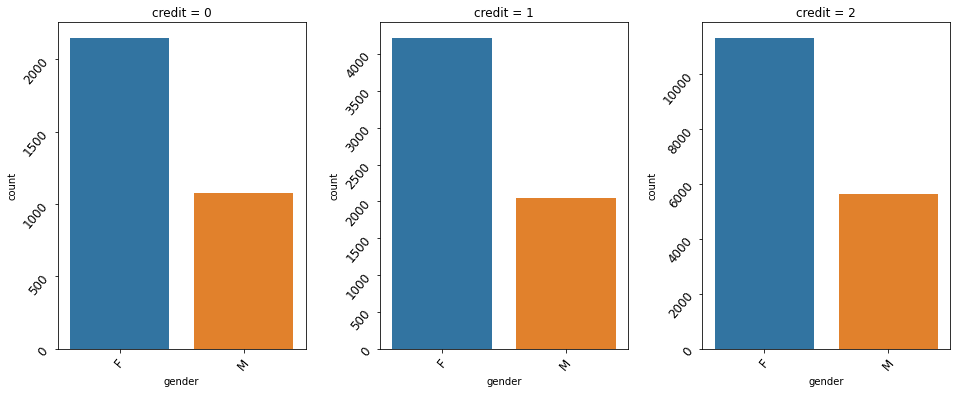

In [31]:
cat_plot("gender")


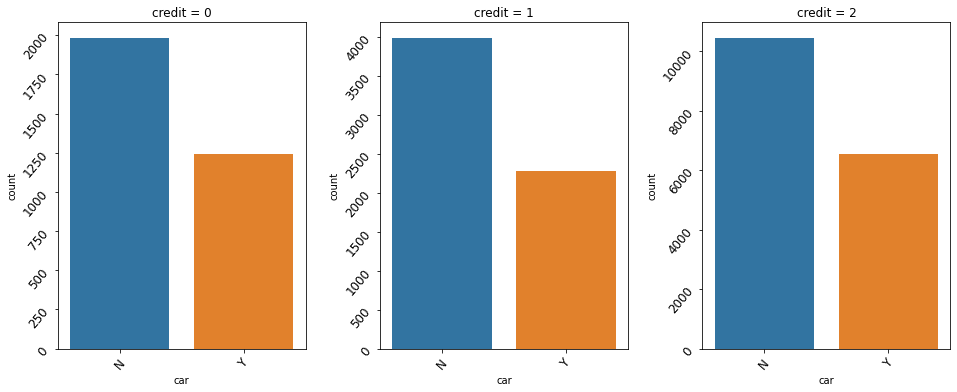

In [32]:
cat_plot('car')

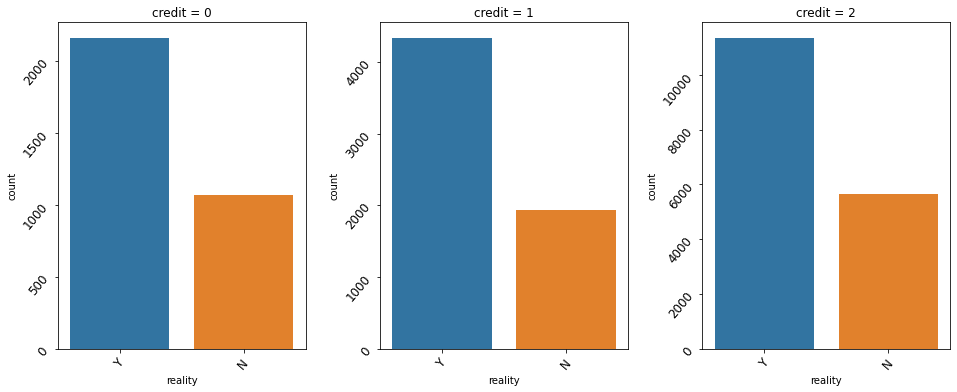

In [33]:
cat_plot('reality')


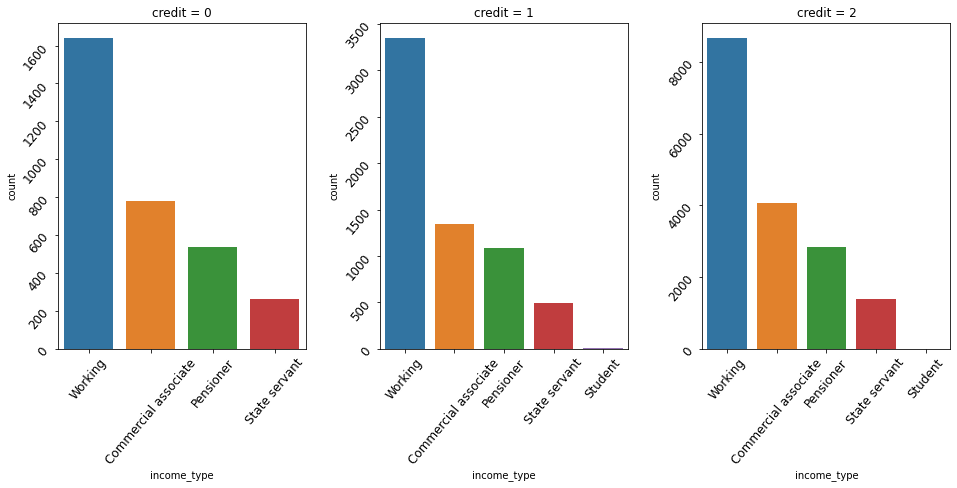

In [34]:
cat_plot('income_type') 


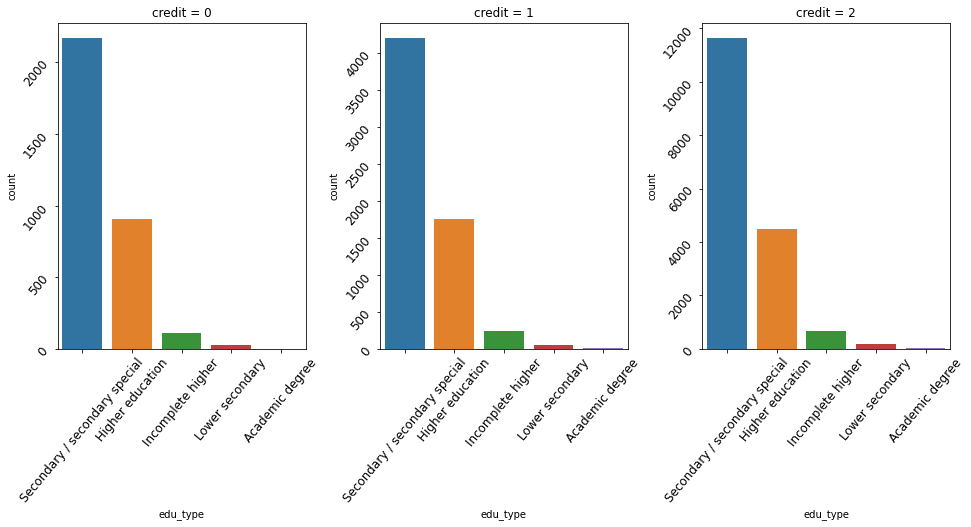

In [35]:
cat_plot('edu_type')


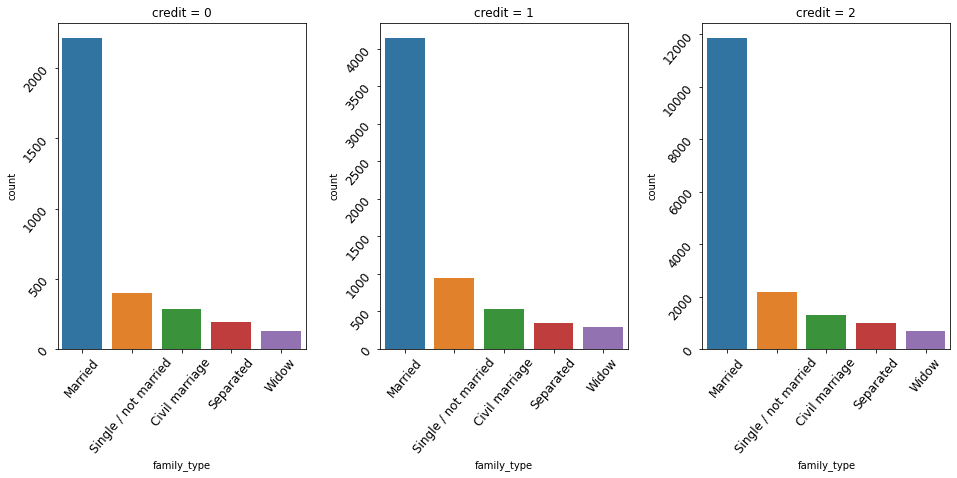

In [36]:
cat_plot('family_type')


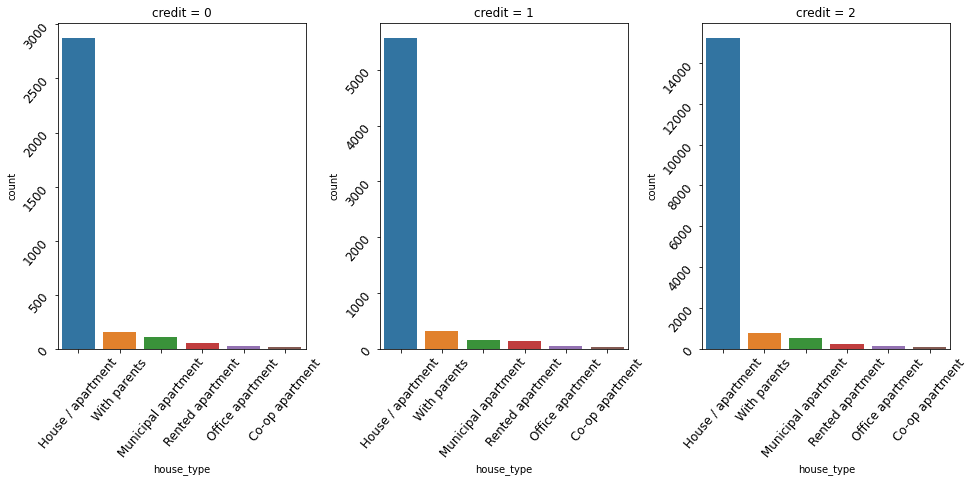

In [37]:
cat_plot('house_type')


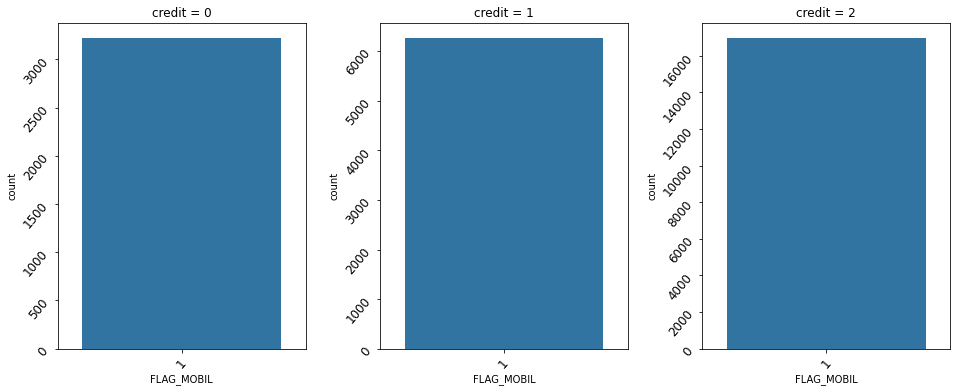

In [38]:
cat_plot('FLAG_MOBIL')


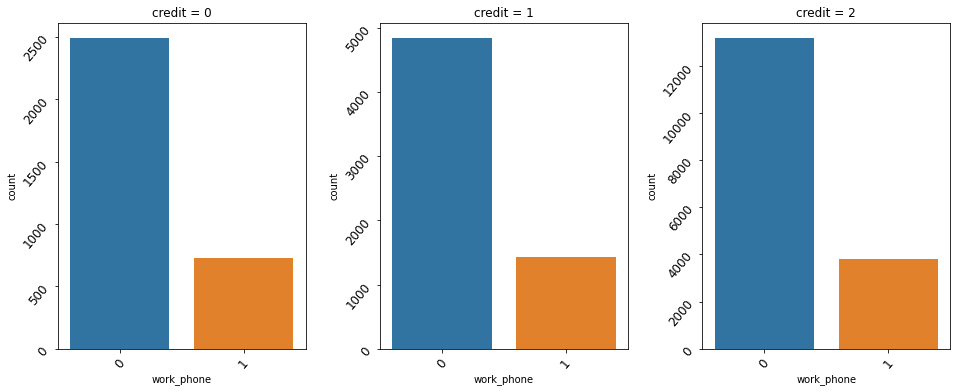

In [39]:
cat_plot('work_phone')


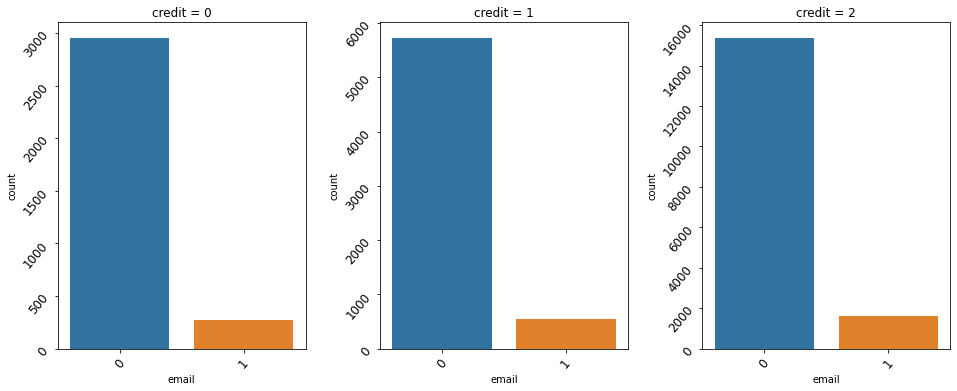

In [40]:
cat_plot('email')


In [41]:
train_0 = train_0.fillna({'occyp_type':'Unemployed'})
train_1 = train_1.fillna({'occyp_type':'Unemployed'})
train_2 = train_2.fillna({'occyp_type':'Unemployed'})


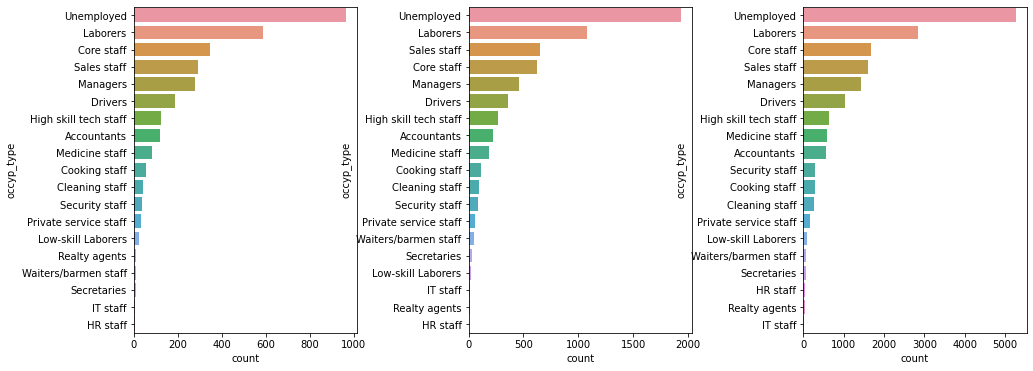

In [42]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.countplot(y = 'occyp_type', data = train_0, order = train_0['occyp_type'].value_counts().index, ax=ax[0])
sns.countplot(y = 'occyp_type', data = train_1, order = train_1['occyp_type'].value_counts().index, ax=ax[1])
sns.countplot(y = 'occyp_type', data = train_2, order = train_2['occyp_type'].value_counts().index, ax=ax[2])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()


# Numerical Variable EDA

In [43]:
# Numerical 그래프 함수 정의
def num_plot(column):
  
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

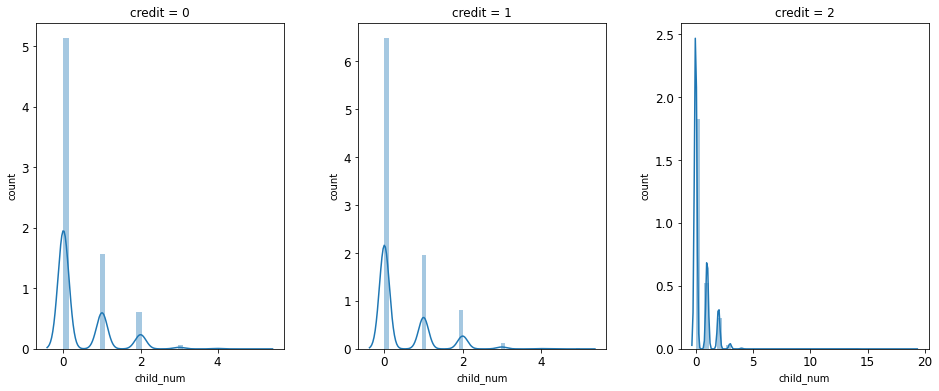

In [44]:
num_plot("child_num")


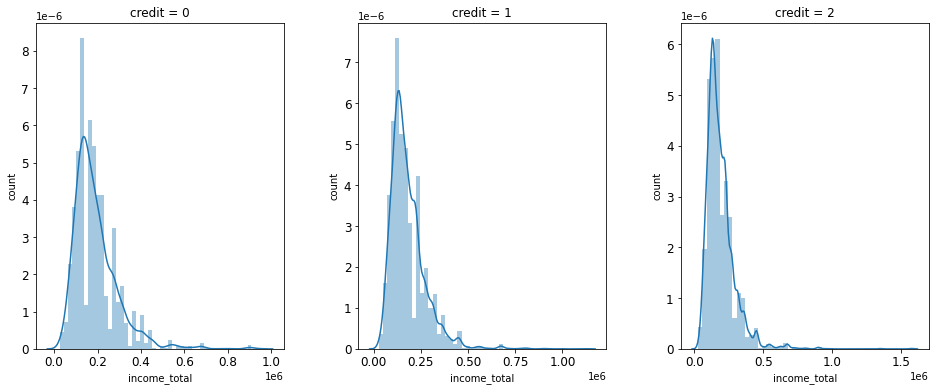

In [45]:
num_plot("income_total")


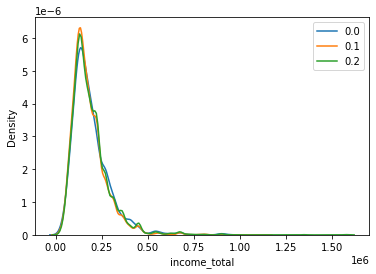

In [46]:
sns.distplot(train_0['income_total'],label='0.0', hist=False)
sns.distplot(train_1['income_total'],label='0.1', hist=False)
sns.distplot(train_2['income_total'],label='0.2', hist=False)
plt.legend()

In [47]:
train_0['Age'] = abs(train_0['DAYS_BIRTH'])/360
train_1['Age'] = abs(train_1['DAYS_BIRTH'])/360
train_2['Age'] = abs(train_2['DAYS_BIRTH'])/360
train_0['Age'].head()

3     41.911111
7     41.377778
12    33.161111
15    35.719444
22    42.216667
Name: Age, dtype: float64

In [48]:
train_0 = train_0.astype({'Age': 'int'})
train_1 = train_1.astype({'Age': 'int'})
train_2 = train_2.astype({'Age': 'int'})
train_0['Age'].head()


3     41
7     41
12    33
15    35
22    42
Name: Age, dtype: int64

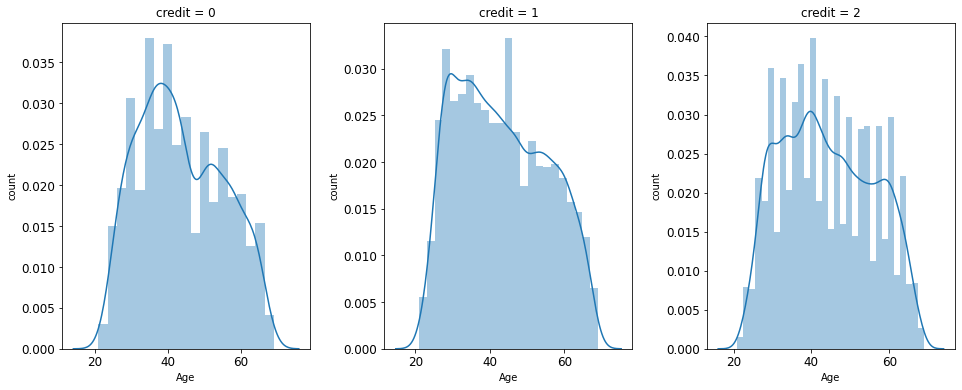

In [49]:
num_plot("Age")


In [50]:
train_0['EMPLOYED']= train_0['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_1['EMPLOYED']= train_1['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_2['EMPLOYED']= train_2['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_0['EMPLOYED'] = abs(train_0['EMPLOYED'])/360
train_1['EMPLOYED'] = abs(train_1['EMPLOYED'])/360
train_2['EMPLOYED'] = abs(train_2['EMPLOYED'])/360
train_0['EMPLOYED'].head()


3      5.811111
7     15.055556
12     6.005556
15    11.266667
22     3.769444
Name: EMPLOYED, dtype: float64

In [51]:
train_0 = train_0.astype({'EMPLOYED': 'int'})
train_1 = train_1.astype({'EMPLOYED': 'int'})
train_2 = train_2.astype({'EMPLOYED': 'int'})


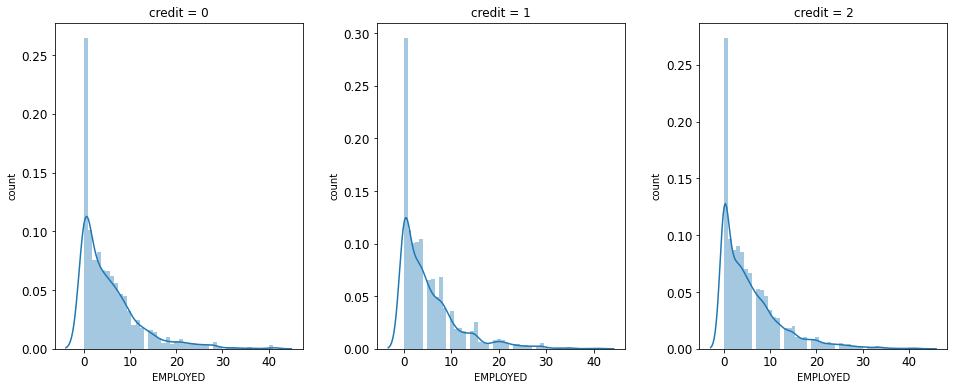

In [52]:
num_plot("EMPLOYED")


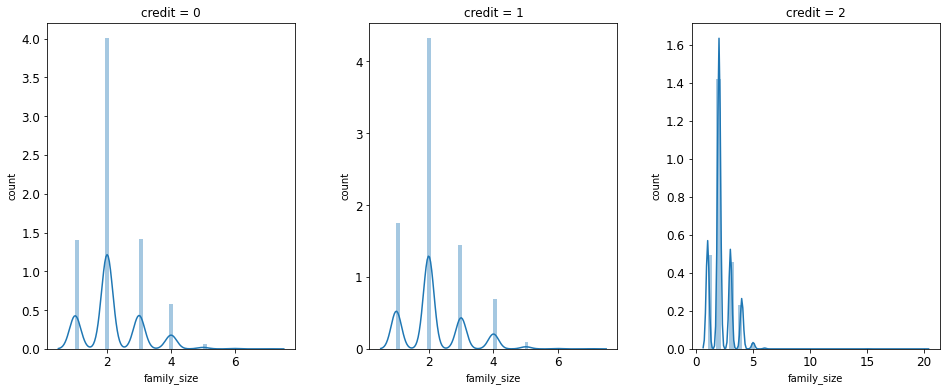

In [53]:
num_plot("family_size")


In [54]:
train_0['Month'] = abs(train_0['begin_month'])
train_1['Month'] = abs(train_1['begin_month'])
train_2['Month'] = abs(train_2['begin_month'])
train_0 = train_0.astype({'Month': 'int'})
train_1 = train_1.astype({'Month': 'int'})
train_2 = train_2.astype({'Month': 'int'})
train_0['Month'].head()


3     37
7     53
12    60
15    60
22    22
Name: Month, dtype: int64

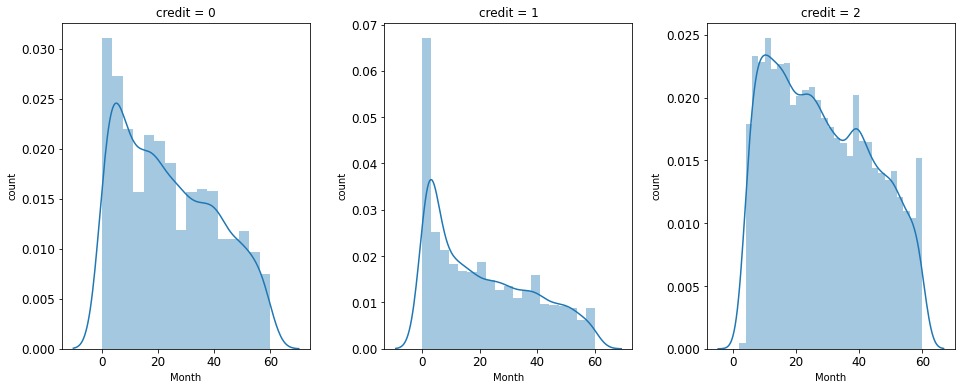

In [55]:
num_plot("Month")
